# Imports

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os
import pandas as pd
import seaborn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
import math

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# ignore convergence warning for now
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning,
                            module="sklearn")

# Data Exploration

In [2]:
df = pd.read_csv("data.csv")
manual = pd.read_csv("data.csv")

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
df.shape

(569, 32)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


# Data Pre-processing


In [7]:
df.drop(['id'], axis=1, inplace=True)
manual.drop(['id'], axis=1, inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [9]:
data=[df]
manuals =[manual]

In [10]:
diagnosis = {"B": 0, "M": 1}

for dataset in data:
    dataset['diagnosis'] = dataset['diagnosis'].map(diagnosis)
for dataset in manuals:
    dataset['diagnosis'] = dataset['diagnosis'].map(diagnosis)

In [11]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# Split Data

In [12]:
X = df.drop(['diagnosis'], axis = 1)
y = df.diagnosis

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 0)

# Model 1: Logistic Regression w/ Raw Data

In [14]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

from sklearn.model_selection import cross_val_score
scores = cross_val_score(log_reg, X_train, y_train, cv=10)
score = scores.mean()

from sklearn.metrics import accuracy_score
y_pred = log_reg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print ('Cross validation score for Logistic Regression Model is ' , score)
print ('Test set accuracy score for Logistic Regression Model is ' , accuracy)

Cross validation score for Logistic Regression Model is  0.9437430786267995
Test set accuracy score for Logistic Regression Model is  0.951048951048951


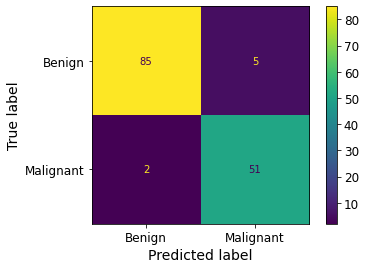

0.9622641509433962


In [15]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Benign', 'Malignant'])

cm_display.plot()
plt.show()

from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred)
print(recall)

# Model 2: Decision Tree w/ Raw Data

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
param = {
    "max_depth":range(1,9),
    "max_leaf_nodes":range (2,20),
}
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X_train, y_train, cv=10)
scores.mean()
score2=scores.mean()

from sklearn.metrics import accuracy_score
y_pred2 = model.predict(X_test)
accuracy2 = accuracy_score(y_test, y_pred2)

print ('Cross validation score for Decision Tree Model is ' , score2)
print ('Test set accuracy score for Decision Tree Model is ' , accuracy2)

Cross validation score for Decision Tree Model is  0.9225913621262458
Test set accuracy score for Decision Tree Model is  0.916083916083916


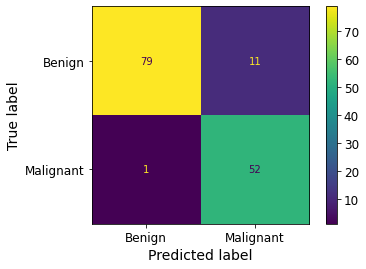

0.9811320754716981


In [17]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

confusion_matrix2 = metrics.confusion_matrix(y_test, y_pred2)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix2, display_labels = ['Benign', 'Malignant'])

cm_display.plot()
plt.show()

from sklearn.metrics import recall_score
recall2 = recall_score(y_test, y_pred2)
print(recall2)

# Model 3: Random Forest w/ Raw Data

In [18]:
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier(n_estimators = 100, random_state=42)
rnd_clf.fit(X_train, y_train)

from sklearn.model_selection import cross_val_score
scores = cross_val_score(rnd_clf, X_train, y_train, cv=10)
scores.mean()
score3=scores.mean()

from sklearn.metrics import accuracy_score
y_pred3 = rnd_clf.predict(X_test)
accuracy3 = accuracy_score(y_test, y_pred3)

print ('Cross validation score for Random Forest Model is ' , score3)
print ('Test set accuracy score for Random Forest Model is ' , accuracy3)

Cross validation score for Random Forest Model is  0.9554817275747508
Test set accuracy score for Random Forest Model is  0.972027972027972


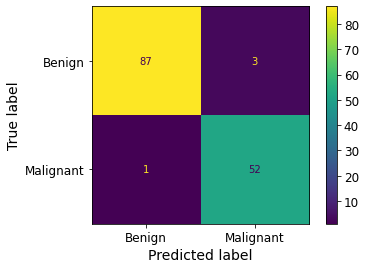

0.9811320754716981


In [19]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

confusion_matrix3 = metrics.confusion_matrix(y_test, y_pred3)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix3, display_labels = ['Benign', 'Malignant'])

cm_display.plot()
plt.show()

from sklearn.metrics import recall_score
recall3 = recall_score(y_test, y_pred3)
print(recall3)

# Additional Manual Pre-processing


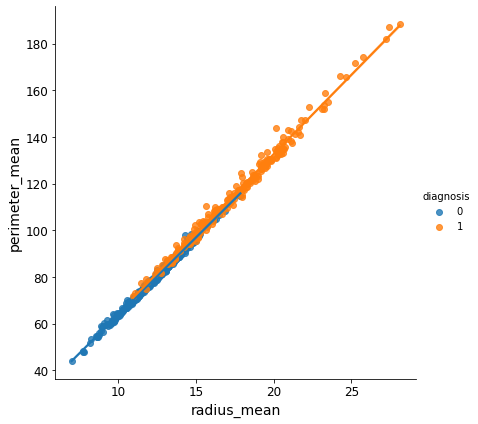

In [20]:
seaborn.lmplot(x="radius_mean", y="perimeter_mean", hue ="diagnosis", data=df, height = 6)

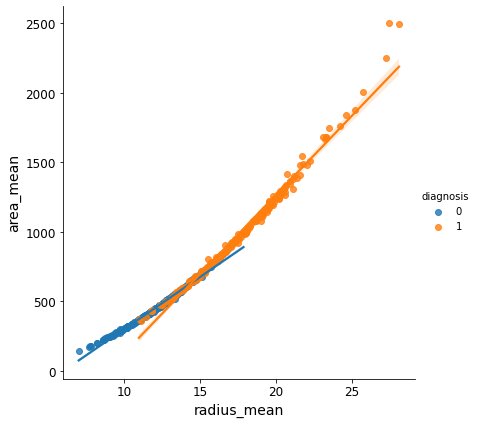

In [21]:
seaborn.lmplot(x="radius_mean", y="area_mean", hue ="diagnosis", data=df, height = 6)

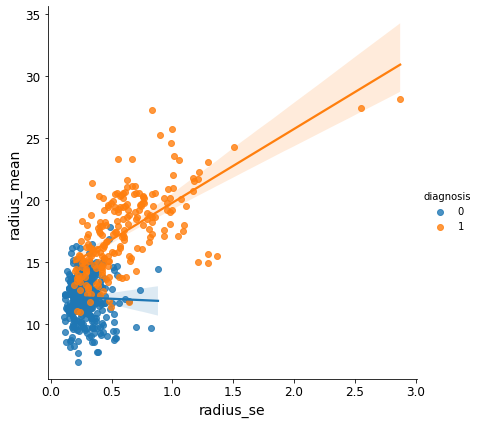

In [22]:
seaborn.lmplot(x="radius_se", y="radius_mean", hue ="diagnosis", data=df, height = 6)

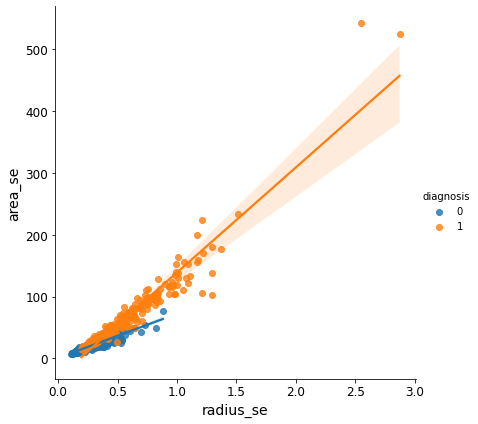

In [23]:
seaborn.lmplot(x="radius_se", y="area_se", hue ="diagnosis", data=df, height = 6)

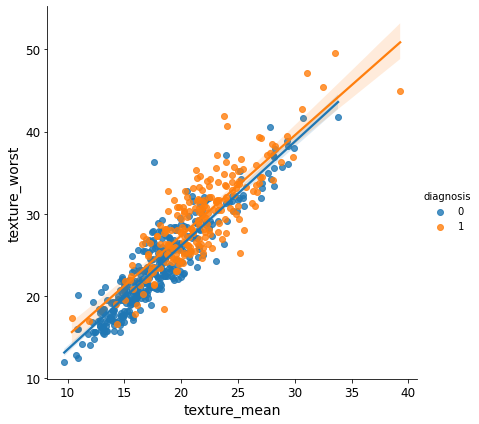

In [24]:
seaborn.lmplot(x="texture_mean", y="texture_worst", hue ="diagnosis", data=df, height = 6)

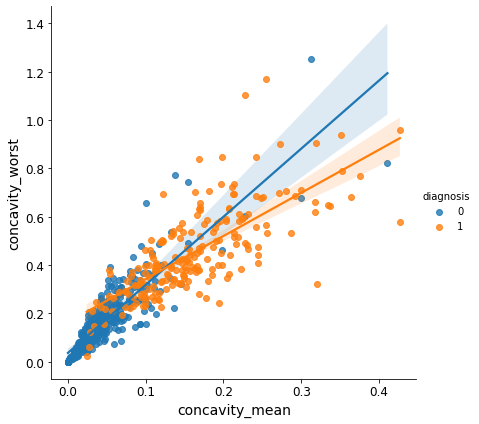

In [25]:
seaborn.lmplot(x="concavity_mean", y="concavity_worst", hue ="diagnosis", data=df, height = 6)

<AxesSubplot:>

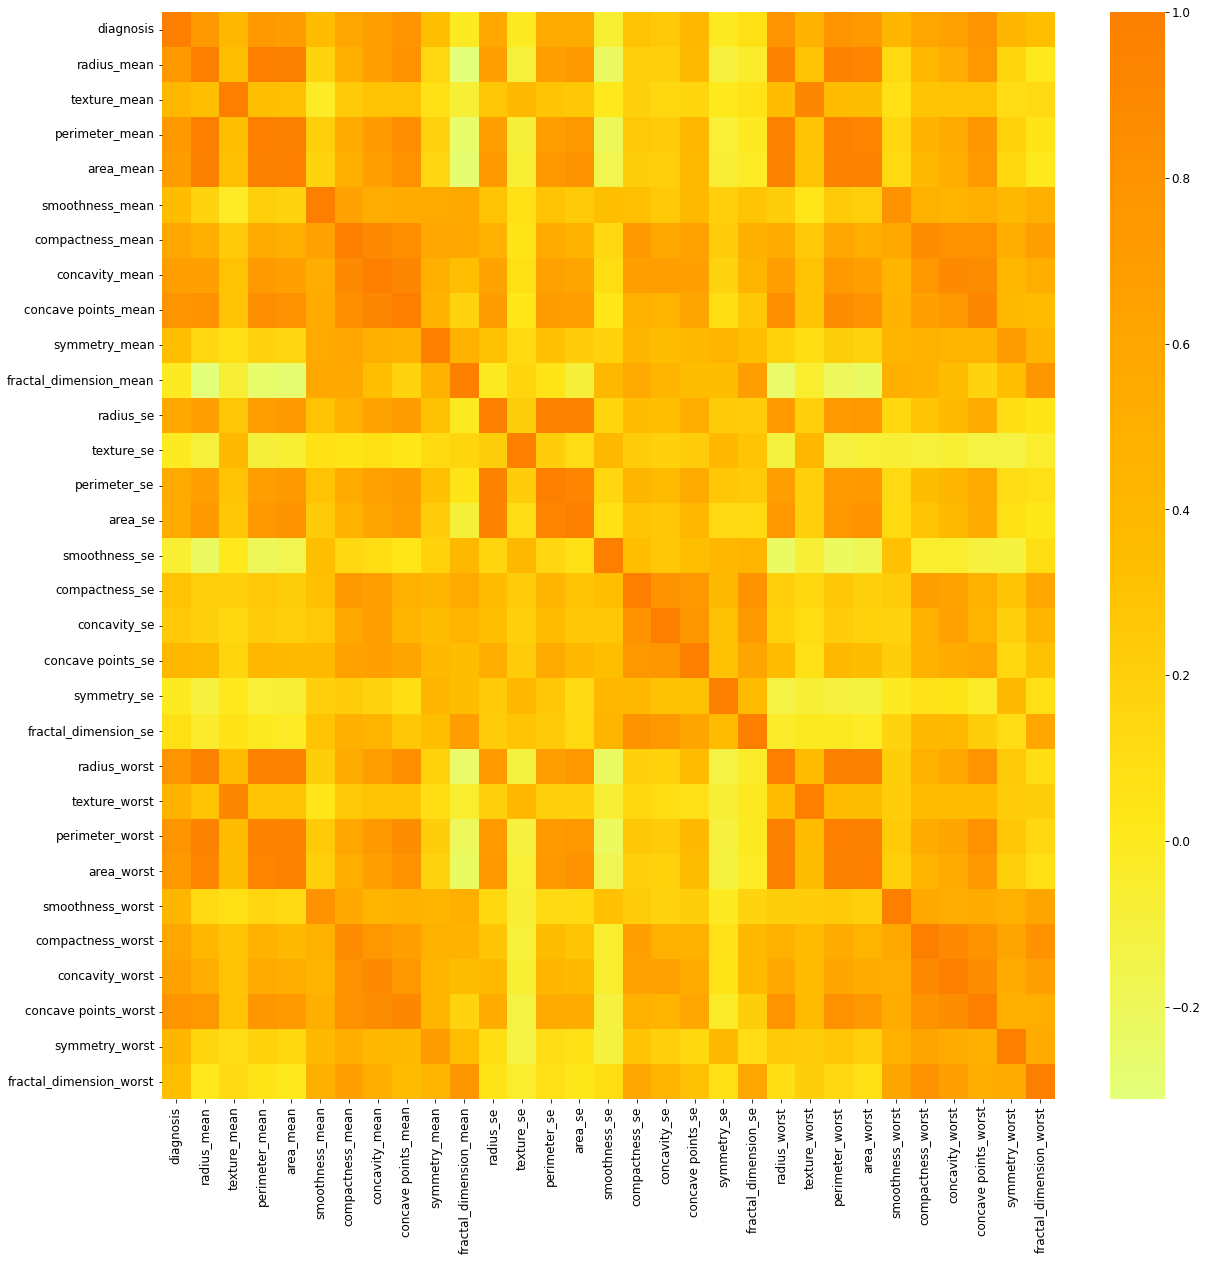

In [26]:
plt.figure(figsize=(20,20))
corr = df.corr()
seaborn.heatmap(corr, cmap = 'Wistia', annot= False)

In [27]:
manual.drop(['perimeter_mean', 'area_mean','perimeter_se', 'radius_se', 'texture_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'perimeter_worst', 'area_worst'], axis=1, inplace=True)

<AxesSubplot:>

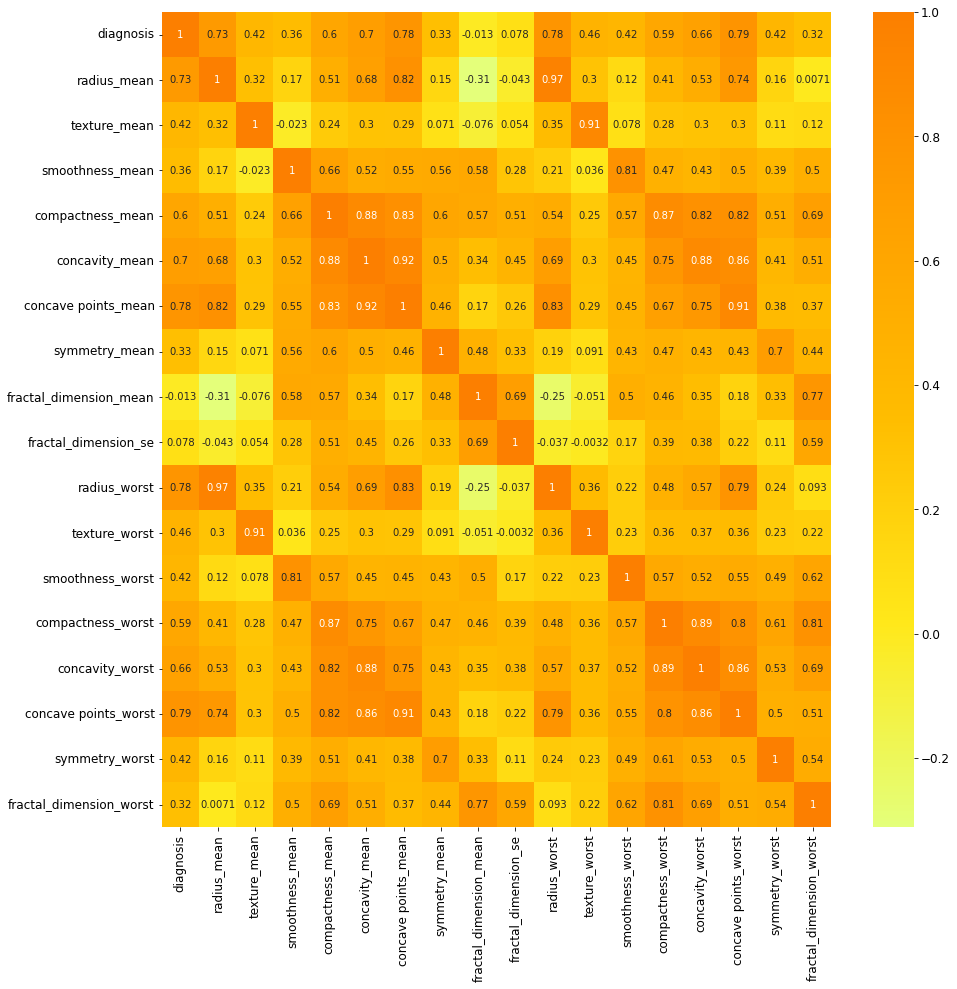

In [28]:
plt.figure(figsize=(15,15))
corr = manual.corr()
seaborn.heatmap(corr, cmap = 'Wistia', annot= True)

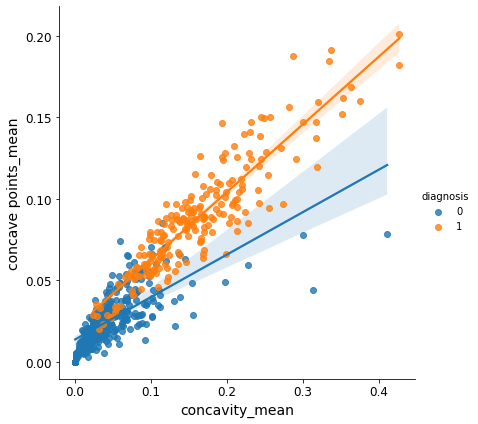

In [29]:
seaborn.lmplot(x="concavity_mean", y="concave points_mean", hue ="diagnosis", data=manual, height = 6)

In [30]:
manual.drop(['fractal_dimension_mean', 'fractal_dimension_se', 'radius_mean', 'texture_mean', 'smoothness_mean', 'compactness_worst', 'concavity_worst', 'concavity_mean', 'concave points_mean', 'symmetry_mean' ], axis=1, inplace=True)

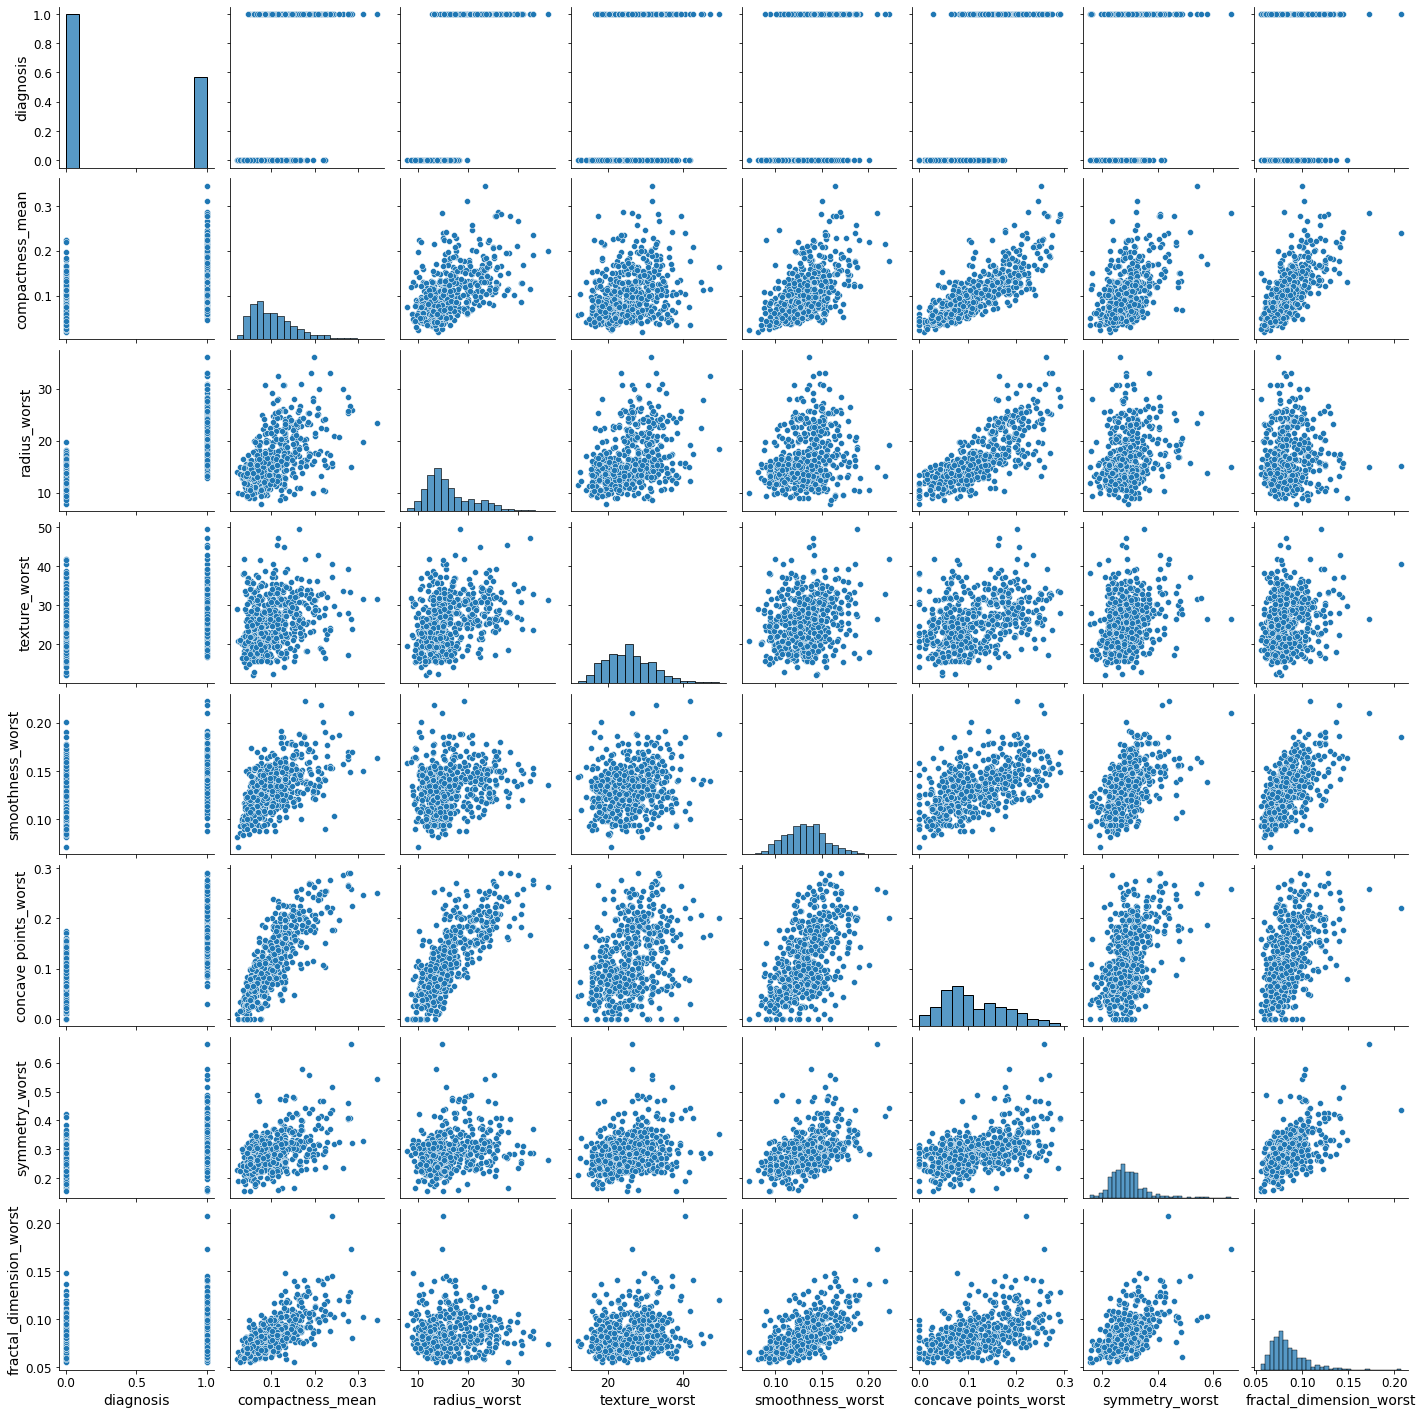

In [31]:
visual=seaborn.pairplot(manual)
visual

<AxesSubplot:>

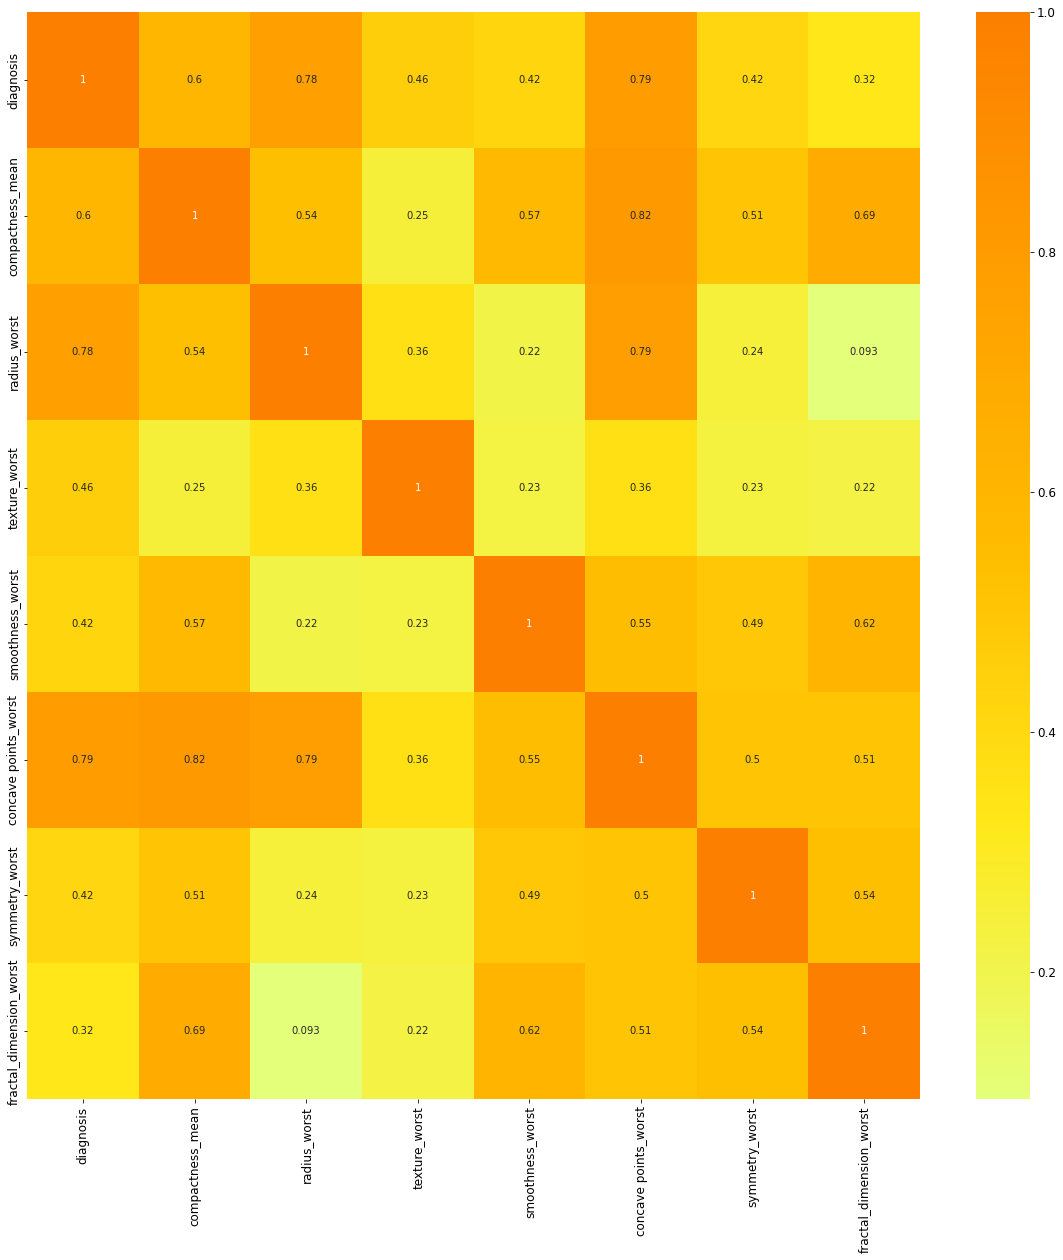

In [32]:
plt.figure(figsize=(20,20))
corr = manual.corr()
seaborn.heatmap(corr, cmap = 'Wistia', annot= True)

# Split Data

In [33]:
X_manual = manual.drop(['diagnosis'], axis = 1)
y_manual = manual.diagnosis

In [34]:
print(X_manual)

     compactness_mean  radius_worst  texture_worst  smoothness_worst  \
0             0.27760        25.380          17.33           0.16220   
1             0.07864        24.990          23.41           0.12380   
2             0.15990        23.570          25.53           0.14440   
3             0.28390        14.910          26.50           0.20980   
4             0.13280        22.540          16.67           0.13740   
..                ...           ...            ...               ...   
564           0.11590        25.450          26.40           0.14100   
565           0.10340        23.690          38.25           0.11660   
566           0.10230        18.980          34.12           0.11390   
567           0.27700        25.740          39.42           0.16500   
568           0.04362         9.456          30.37           0.08996   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
0                  0.2654          0.4601                  0.11890

In [35]:
print(y_manual)

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64


In [36]:
X_train_man, X_test_man, y_train_man, y_test_man = train_test_split(X_manual,y_manual, random_state = 0)

In [37]:
X_train_man

,compactness_mean,radius_worst,texture_worst,smoothness_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
293,0.05642,13.060,25.75,0.13690,0.09140,0.3101,0.07007
332,0.06779,11.980,25.78,0.14240,0.02022,0.3292,0.06522
565,0.10340,23.690,38.25,0.11660,0.16280,0.2572,0.06637
278,0.04052,15.500,26.10,0.10500,0.05185,0.2335,0.06263
489,0.07112,19.180,26.56,0.10090,0.08737,0.4677,0.07623
...,...,...,...,...,...,...,...
277,0.05884,19.960,24.30,0.12430,0.12940,0.2567,0.05737
9,0.23960,15.090,40.68,0.18530,0.22100,0.4366,0.20750
359,0.05956,12.020,25.02,0.13330,0.05052,0.2454,0.08136
192,0.02344,9.968,20.83,0.07117,0.00000,0.1909,0.06559


In [38]:
y_train_man

293    0
332    0
565    1
278    0
489    1
      ..
277    1
9      1
359    0
192    0
559    0
Name: diagnosis, Length: 426, dtype: int64

In [39]:
X_test_man

,compactness_mean,radius_worst,texture_worst,smoothness_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
512,0.14690,16.41,29.66,0.15740,0.20510,0.3585,0.11090
457,0.05205,14.35,34.23,0.12890,0.06005,0.2444,0.06788
439,0.05581,14.91,19.31,0.10340,0.08216,0.2136,0.06710
298,0.05220,16.22,25.26,0.09445,0.07530,0.2636,0.07676
37,0.03766,13.30,22.81,0.09701,0.05013,0.1987,0.06169
...,...,...,...,...,...,...,...
236,0.16820,31.01,34.51,0.14810,0.25930,0.3103,0.08677
113,0.13030,11.16,22.75,0.13000,0.06136,0.2383,0.09026
527,0.06307,13.61,19.27,0.12920,0.10700,0.3110,0.07592
76,0.10470,14.08,12.49,0.14510,0.07407,0.2710,0.07191


In [40]:
y_test_man

512    1
457    0
439    0
298    0
37     0
      ..
236    1
113    0
527    0
76     0
162    1
Name: diagnosis, Length: 143, dtype: int64

# Model 4: Logistic Regression Model w/ Manual Data Manipulation

In [41]:
from sklearn.linear_model import LogisticRegression
log_reg2 = LogisticRegression(random_state=42)
log_reg2.fit(X_train_man, y_train_man)

from sklearn.model_selection import cross_val_score
scores = cross_val_score(log_reg2, X_train_man, y_train_man, cv=10)
score4 = scores.mean()

from sklearn.metrics import accuracy_score
y_pred4 = log_reg2.predict(X_test_man)
accuracy4 = accuracy_score(y_test_man, y_pred4)

print ('Cross validation score for Logistic Regression Model is ' , score4)
print ('Test set accuracy score for Logistic Regression Model is ' , accuracy4)

Cross validation score for Logistic Regression Model is  0.9461240310077519
Test set accuracy score for Logistic Regression Model is  0.965034965034965


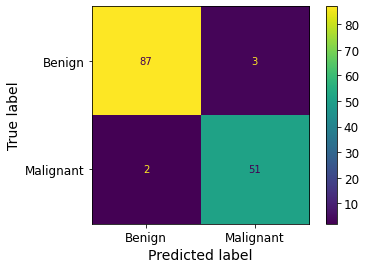

0.9622641509433962


In [42]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

confusion_matrix4 = metrics.confusion_matrix(y_test, y_pred4)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix4, display_labels = ['Benign', 'Malignant'])

cm_display.plot()
plt.show()

from sklearn.metrics import recall_score
recall4 = recall_score(y_test, y_pred4)
print(recall4)

# Model 5: Decision Tree Model w/ Manual Data Manipulation

In [43]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
param = {
    "max_depth":range(1,9),
    "max_leaf_nodes":range (2,20),
}
model2 = DecisionTreeClassifier(random_state=42)
model2.fit(X_train_man, y_train_man)

from sklearn.model_selection import cross_val_score
scores = cross_val_score(model2, X_train_man, y_train_man, cv=10)
scores.mean()
score5=scores.mean()

from sklearn.metrics import accuracy_score
y_pred5 = model2.predict(X_test_man)
accuracy5 = accuracy_score(y_test_man, y_pred5)

print ('Cross validation score for Decision Tree Model is ' , score5)
print ('Test set accuracy score for Decision Tree Model is ' , accuracy5)

Cross validation score for Decision Tree Model is  0.9226467331118494
Test set accuracy score for Decision Tree Model is  0.9300699300699301


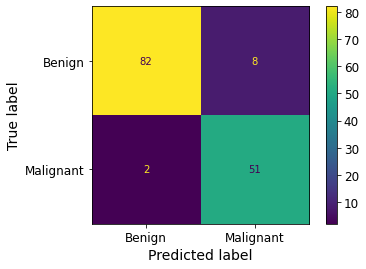

0.9622641509433962


In [44]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

confusion_matrix5 = metrics.confusion_matrix(y_test, y_pred5)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix5, display_labels = ['Benign', 'Malignant'])

cm_display.plot()
plt.show()

from sklearn.metrics import recall_score
recall5 = recall_score(y_test, y_pred5)
print(recall5)

# Model 6: Random Forest Model w/ Manual Data Manipulation

In [45]:
from sklearn.ensemble import RandomForestClassifier
rnd_clf2 = RandomForestClassifier(n_estimators = 100, random_state=42)
rnd_clf2.fit(X_train_man, y_train_man)

from sklearn.model_selection import cross_val_score
scores = cross_val_score(rnd_clf2, X_train_man, y_train_man, cv=10)
scores.mean()
score6=scores.mean()

from sklearn.metrics import accuracy_score
y_pred6 = rnd_clf2.predict(X_test_man)
accuracy6 = accuracy_score(y_test_man, y_pred6)

print ('Cross validation score for Random Forest Model is ' , score6)
print ('Test set accuracy score for Random Forest Model is ' , accuracy6)

Cross validation score for Random Forest Model is  0.9461240310077519
Test set accuracy score for Random Forest Model is  0.972027972027972


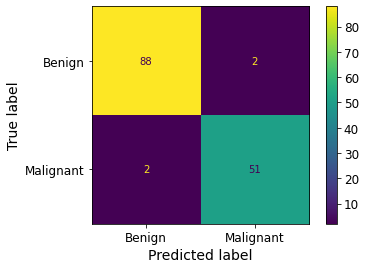

0.9622641509433962


In [46]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

confusion_matrix6 = metrics.confusion_matrix(y_test, y_pred6)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix6, display_labels = ['Benign', 'Malignant'])

cm_display.plot()
plt.show()

from sklearn.metrics import recall_score
recall6 = recall_score(y_test, y_pred6)
print(recall6)

# Using PCA Instead of Manual Data Manipulation

In [47]:
from sklearn.preprocessing import StandardScaler
X_train_scaled=StandardScaler().fit_transform(X_train)

X_test_scaled=StandardScaler().fit_transform(X_test)

In [48]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.95)
X_train_pca = pca.fit_transform(X_train_scaled)

X_test_pca = pca.transform(X_test_scaled)

# Model 7: Logistic Regression Model w/ PCA Data

In [49]:
from sklearn.linear_model import LogisticRegression
log_reg3 = LogisticRegression(random_state=42)
log_reg3.fit(X_train_pca, y_train)

from sklearn.model_selection import cross_val_score
scores = cross_val_score(log_reg3, X_train_pca, y_train, cv=10)
score7 = scores.mean()

from sklearn.metrics import accuracy_score
y_pred7 = log_reg3.predict(X_test_pca)
accuracy7 = accuracy_score(y_test, y_pred7)

print ('Cross validation score for Logistic Regression Model is ' , score7)
print ('Test set accuracy score for Logistic Regression Model is ' , accuracy7)

Cross validation score for Logistic Regression Model is  0.9813399778516058
Test set accuracy score for Logistic Regression Model is  0.951048951048951


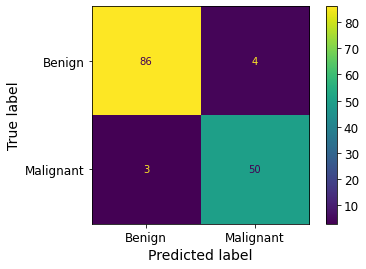

0.9433962264150944


In [50]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

confusion_matrix7 = metrics.confusion_matrix(y_test, y_pred7)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix7, display_labels = ['Benign', 'Malignant'])

cm_display.plot()
plt.show()

from sklearn.metrics import recall_score
recall7 = recall_score(y_test, y_pred7)
print(recall7)

# Model 8: Decision Tree Model w/ PCA Data

In [51]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
param = {
    "max_depth":range(1,9),
    "max_leaf_nodes":range (2,20),
}
model3 = DecisionTreeClassifier(random_state=42)
model3.fit(X_train_pca, y_train)

from sklearn.model_selection import cross_val_score
scores = cross_val_score(model3, X_train_pca, y_train, cv=10)
scores.mean()
score8=scores.mean()

from sklearn.metrics import accuracy_score
y_pred8 = model3.predict(X_test_pca)
accuracy8 = accuracy_score(y_test, y_pred8)

print ('Cross validation score for Decision Tree Model is ' , score8)
print ('Test set accuracy score for Decision Tree Model is ' , accuracy8)

Cross validation score for Decision Tree Model is  0.9205426356589147
Test set accuracy score for Decision Tree Model is  0.8741258741258742


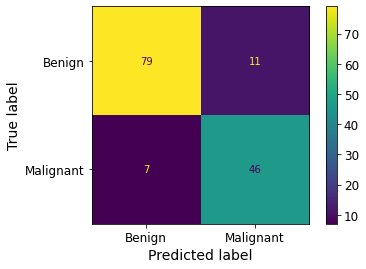

0.8679245283018868


In [52]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

confusion_matrix8 = metrics.confusion_matrix(y_test, y_pred8)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix8, display_labels = ['Benign', 'Malignant'])

cm_display.plot()
plt.show()

from sklearn.metrics import recall_score
recall8 = recall_score(y_test, y_pred8)
print(recall8)

# Model 9: Random Forest Model w/ PCA Data

In [53]:
from sklearn.ensemble import RandomForestClassifier
rnd_clf3 = RandomForestClassifier(n_estimators = 100, random_state=42)
rnd_clf3.fit(X_train_pca, y_train)

from sklearn.model_selection import cross_val_score
scores = cross_val_score(rnd_clf3, X_train_pca, y_train, cv=10)
scores.mean()
score9 = scores.mean()

from sklearn.metrics import accuracy_score
y_pred9 = rnd_clf3.predict(X_test_pca)
accuracy9 = accuracy_score(y_test, y_pred9)

print ('Cross validation score for Random Forest Model is ' , score9)
print ('Test set accuracy score for Random Forest Model is ' , accuracy9)

Cross validation score for Random Forest Model is  0.9508859357696566
Test set accuracy score for Random Forest Model is  0.9300699300699301


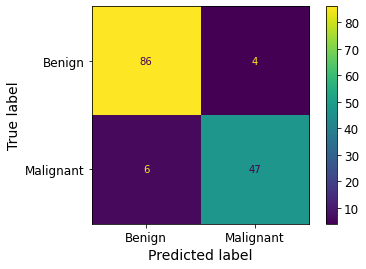

0.8867924528301887


In [54]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

confusion_matrix9 = metrics.confusion_matrix(y_test, y_pred9)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix9, display_labels = ['Benign', 'Malignant'])

cm_display.plot()
plt.show()

from sklearn.metrics import recall_score
recall9 = recall_score(y_test, y_pred9)
print(recall9)

# Model Comparison

In [55]:
print('Logistic with Raw Data--     CV Score:', score, '  Test Score:' , accuracy,  ' Recall:',   recall)
print('Logistic with Manual Data--  CV Score:', score4, '  Test Score:' , accuracy4,  ' Recall:', recall4)
print('Logistic with PCA Data--     CV Score:', score7, '  Test Score:' , accuracy7,  ' Recall:', recall7)

Logistic with Raw Data--     CV Score: 0.9437430786267995   Test Score: 0.951048951048951  Recall: 0.9622641509433962
Logistic with Manual Data--  CV Score: 0.9461240310077519   Test Score: 0.965034965034965  Recall: 0.9622641509433962
Logistic with PCA Data--     CV Score: 0.9813399778516058   Test Score: 0.951048951048951  Recall: 0.9433962264150944


In [56]:
print('Decision Tree with Raw Data--     CV Score:', score2, '  Test Score: ' , accuracy2,  ' Recall:', recall2)
print('Decision Tree with Manual Data--  CV Score:', score5, '  Test Score: ' , accuracy5,  ' Recall:', recall5)
print('Decision Tree with PCA Data--     CV Score:', score8, '  Test Score: ' , accuracy8,  ' Recall:', recall8)

Decision Tree with Raw Data--     CV Score: 0.9225913621262458   Test Score:  0.916083916083916  Recall: 0.9811320754716981
Decision Tree with Manual Data--  CV Score: 0.9226467331118494   Test Score:  0.9300699300699301  Recall: 0.9622641509433962
Decision Tree with PCA Data--     CV Score: 0.9205426356589147   Test Score:  0.8741258741258742  Recall: 0.8679245283018868


In [57]:
print('Random Forest with Raw Data--     CV Score:', score3, '  Test Score: ' , accuracy3,   ' Recall:', recall3)
print('Random Forest with Manual Data--  CV Score:', score6, '  Test Score: ' , accuracy6,   ' Recall:', recall6)
print('Random Forest with PCA Data--     CV Score:', score9, '  Test Score: ' , accuracy9,   ' Recall:', recall9)

Random Forest with Raw Data--     CV Score: 0.9554817275747508   Test Score:  0.972027972027972  Recall: 0.9811320754716981
Random Forest with Manual Data--  CV Score: 0.9461240310077519   Test Score:  0.972027972027972  Recall: 0.9622641509433962
Random Forest with PCA Data--     CV Score: 0.9508859357696566   Test Score:  0.9300699300699301  Recall: 0.8867924528301887
